## ARTY DATA ANALYSIS 
**Author:** Vittoria Pavanello 

> This program rapidly reads the data stored by the ALPIDE chip conntected to the ARTY FPGA.

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
path = "/content/drive/MyDrive/Tesi/DataTakingALPIDE/data/"
filenpy = "testSr_th57_STROBE10000-1000_packet_0.npy"
filename = path + filenpy
data = np.load(filename, allow_pickle=True)
# First number: Package, Second: Events inside package, Thrid: x or y

In [10]:
# Plot settings 
xLim = 1024; yLim = 512
params = {'xtick.labelsize':'16', 'ytick.labelsize':'16', 'axes.titlesize':'16', 
          'legend.fontsize':'16', 'figure.titlesize':'16', 'image.cmap':'viridis', 
          'axes.labelsize':'16', 'axes.grid' : 'False'}
cmap = plt.cm.get_cmap("viridis").copy()

<ipython-input-10-a3fd26b8a7c4>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis").copy()


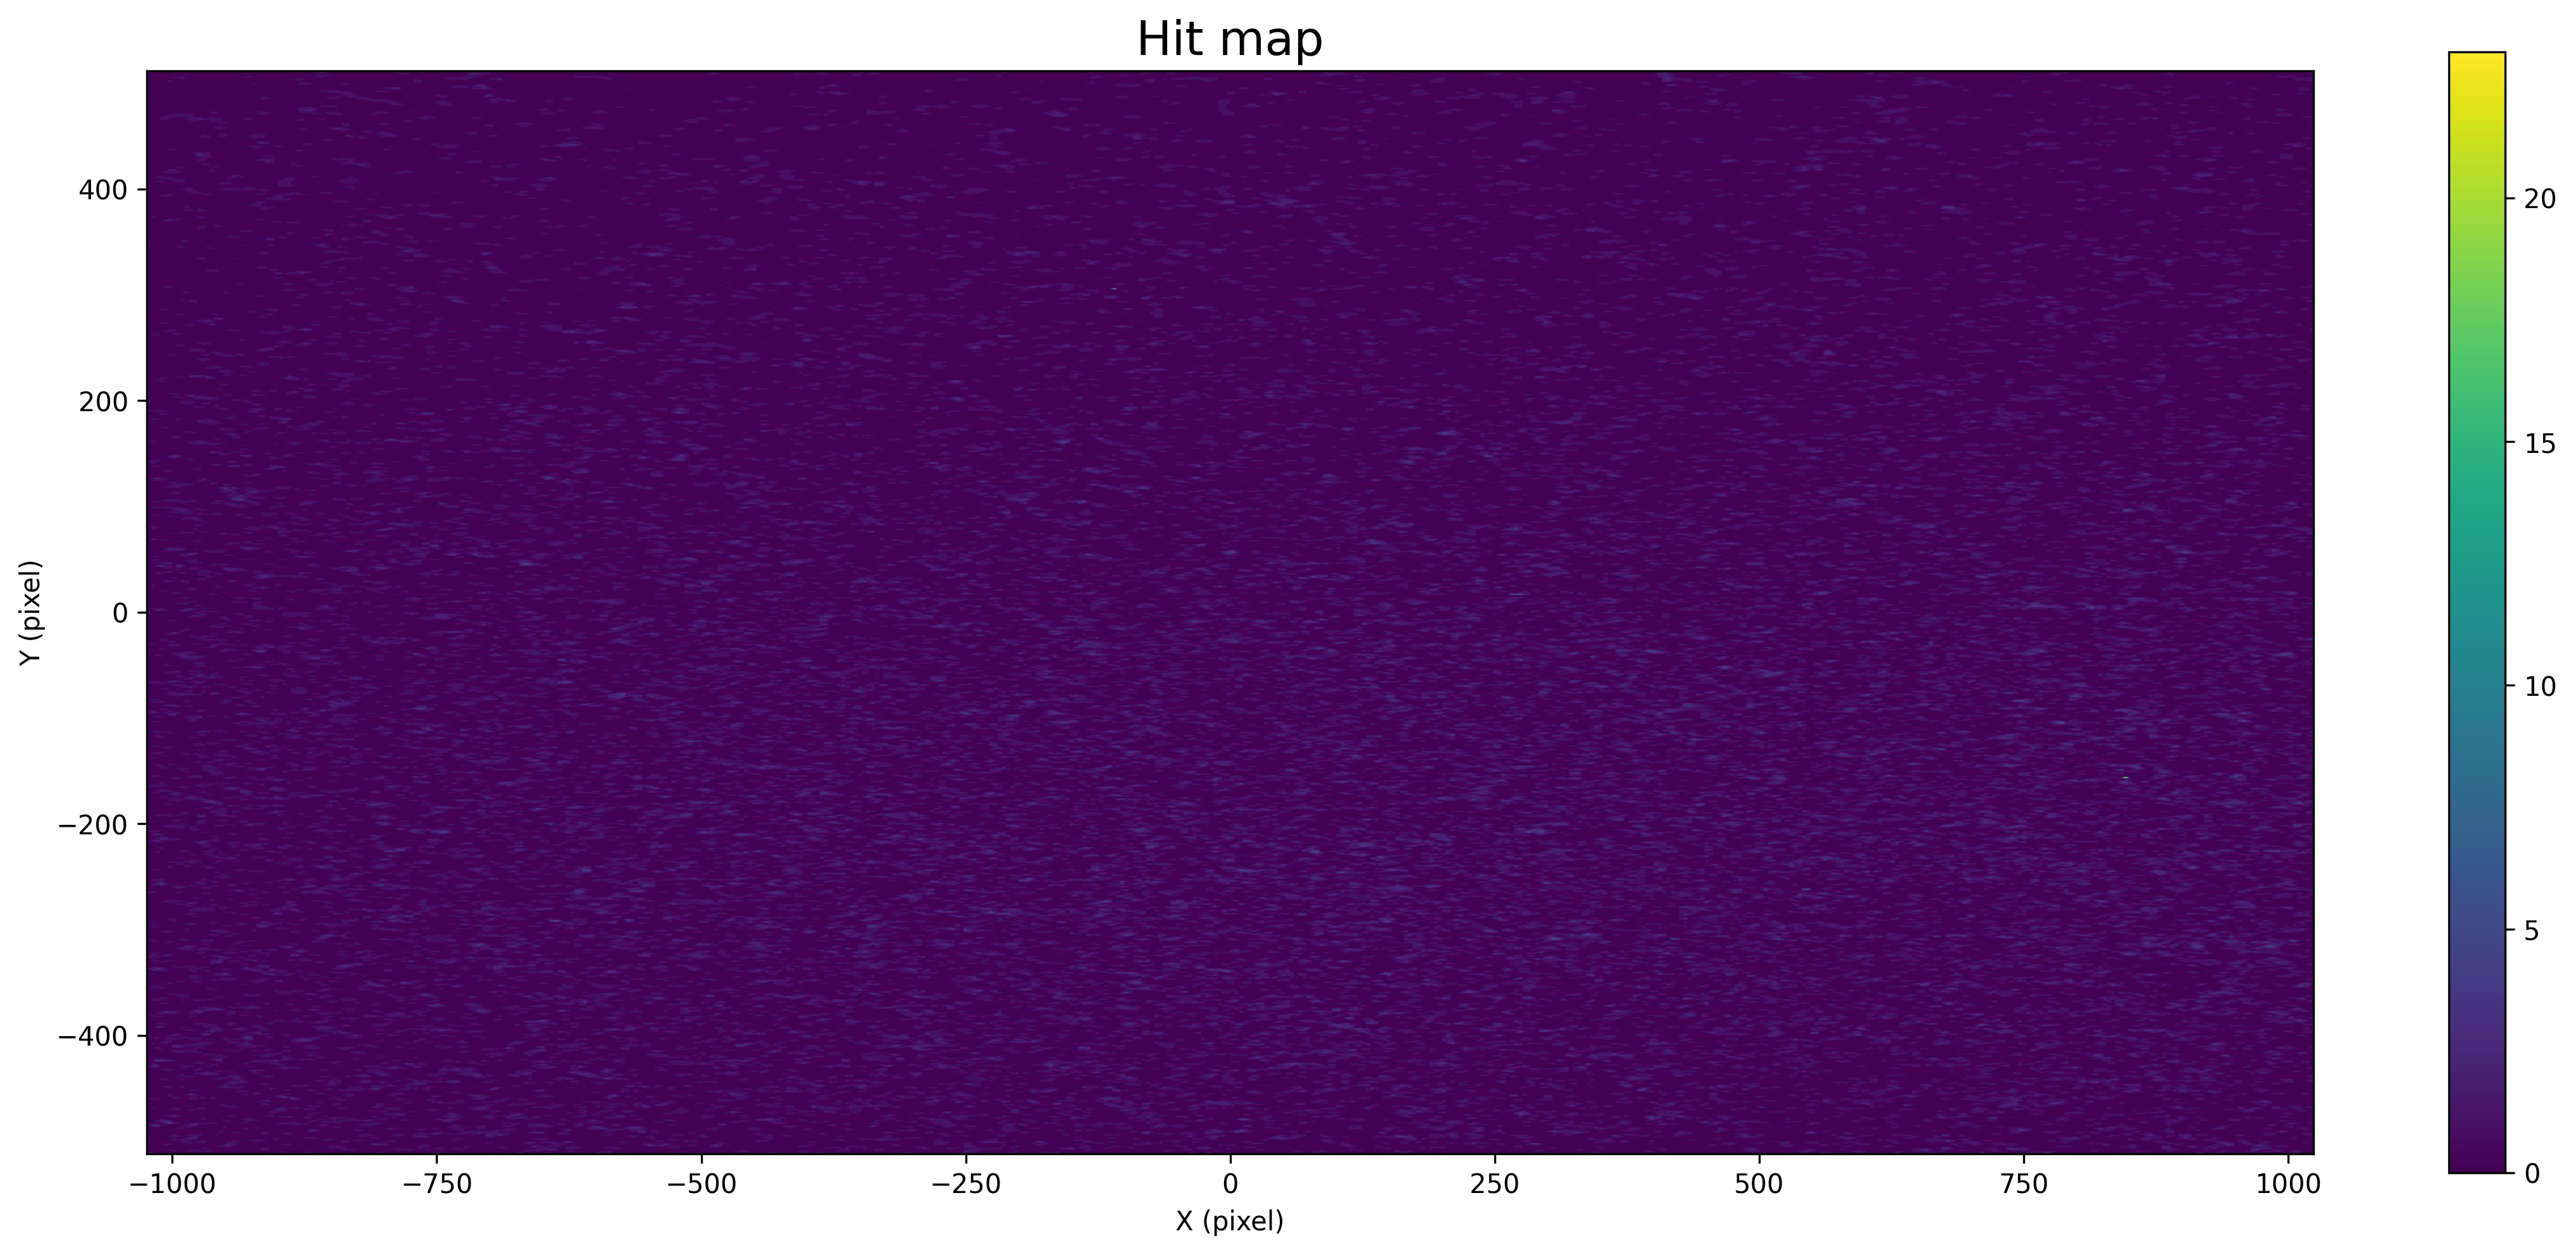

<Figure size 640x480 with 0 Axes>

In [13]:
# Fill 2D histogram 
histo = np.zeros((1024, 512))
for package in data:
    for event in package:
        histo[event[1], event[0]] += 1

# Plot
fig, axes = plt.subplots(figsize=(15,6.5), dpi=300)
fig.tight_layout()
axes.set_xlabel('X (pixel)')
axes.set_ylabel('Y (pixel)')
axes.set_title("Hit map", fontsize = 18)
im = axes.imshow(histo, extent=[-xLim, xLim, -yLim, yLim], cmap=cmap)
plt.colorbar(im, ax=axes)

plt.show()
plt.savefig("ALPIDE_test1.png")
